**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Importing the datasets**

In [2]:
data = pd.read_csv('/Users/godskid/Desktop/datasets/Advertising.csv')

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data.shape

(200, 5)

In [9]:
# Remove the 'Unnamed: 0' column

data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Check for missing values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Data Visualization**

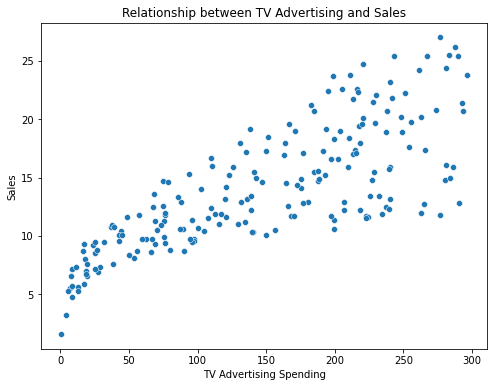

In [27]:
#Scatter plot between 'TV' advertising spending and 'Sales'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TV', y='Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

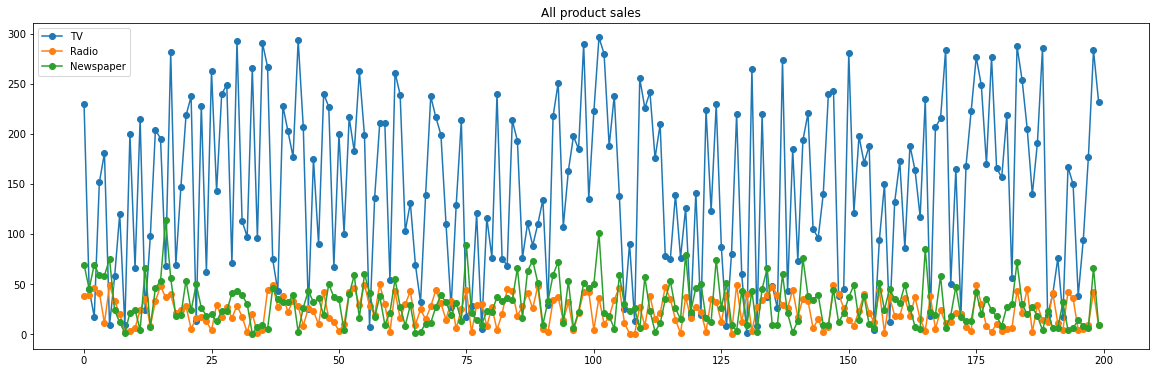

In [12]:
plt.figure(figsize=(20,6))
plt.plot(data['TV'],label='TV',marker='o')
plt.plot(data['Radio'],label='Radio',marker='o')
plt.plot(data['Newspaper'],label='Newspaper',marker='o')
plt.title('All product sales')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Total sales of each product')

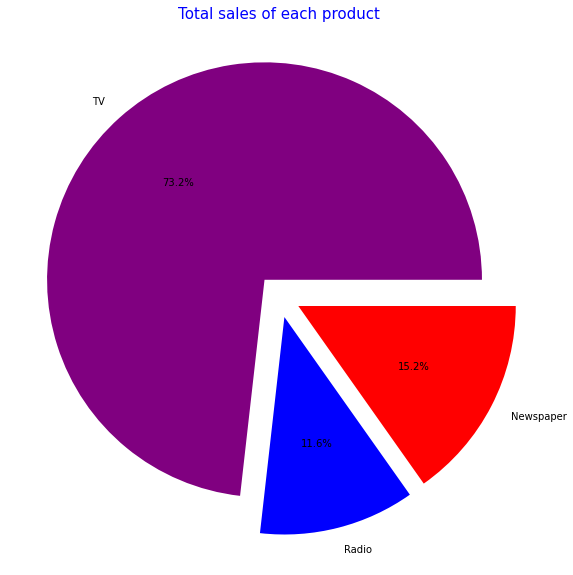

In [13]:
# Sales of each Product

colors = ['purple','blue','red','green','orange','lightcoral']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(10,10))
plt.pie(data[['TV','Radio','Newspaper']].sum().values,explode,
        labels=data[['TV','Radio','Newspaper']].sum().index,
        colors=colors,autopct='%1.1f%%')
plt.title('Total sales of each product',color='blue',fontsize=15)

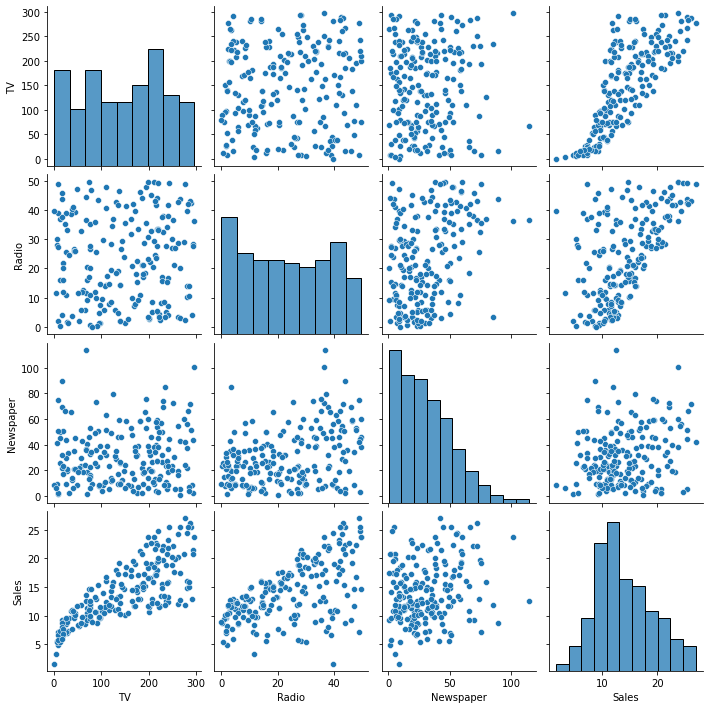

In [14]:
sns.pairplot(data)

<AxesSubplot:>

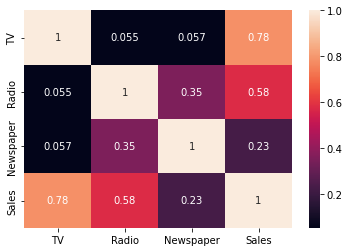

In [15]:
sns.heatmap(data.corr(), annot=True)

**Regression model**

In [16]:
# Setting target

X = data.drop('Sales', axis=1)
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Linear regression

lr = LinearRegression()

lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

In [18]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976106
R-squared: 0.8994380241009119


In [19]:
#Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = dt.predict(X_test)

In [20]:
# Evaluate the model 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.175
R-squared: 0.9310914968293178


**Predicting for new sample**

In [28]:
import random

# Take random 4 rows from the dataset with columns TV, Radio, Newspaper

random.seed(11)  # Setting a seed for reproducibility
sample_data = data[['TV', 'Radio', 'Newspaper']].sample(3)

In [29]:
sample_data

,TV,Radio,Newspaper
51,100.4,9.6,3.6
174,222.4,3.4,13.1
169,284.3,10.6,6.4


In [30]:
prediction = lr.predict(sample_data)

In [31]:
prediction

array([ 9.29612342, 13.60634581, 17.71880786])